In [1]:
import os
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

from dataset_creator import load_and_normalize_grayscale_image

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Dataset installation

To download datasets (Sentinel-1 SAR images), you need to download and extract the files as follows:

- Download the training dataset (~3.5 Gb) and save it as the path **data/train**:

https://drive.usercontent.google.com/download?id=14HqNW5uWLS92n7KrxKgDwUTsSEST6LCr&authuser=0

- Download the validation dataset (~950 Mb) and save it as the path **data/val**:

https://drive.usercontent.google.com/download?id=1GWl3g1G152Rinxc1Fbc-JkSWlRQNWKBK&authuser=0

**This dataset includes images from the Sentinel-1 Synthetic Aperture Radar (SAR) collected in various regions around the world over the course of several days, focusing on areas affected by floods.**

---

# Data inspection and visualization

## Training and test datasets

### Helper functions

Images from Sentinel-1 dataset are named as follows:

- {REGION_NAME}\_{yyyyMMdd}t{HHmmss}\_x-{NUM}\_y-{NUM}\_{vh|vv}*.png

In the Sentinel-1 dataset naming convention, "vh" and "vv" represent different polarizations of Synthetic Aperture Radar (SAR) data. "vh" stands for "Vertical transmit, Horizontal receive," indicating that the radar signal is transmitted vertically, and the backscattered signal is received horizontally. On the other hand, "vv" stands for "Vertical transmit, Vertical receive," where both the radar signal transmission and reception occur in the vertical direction.

In [3]:
def get_df_paths(path, set_type):
    path_pattern = path + "/**/tiles/vv/*.png"
    vv_channel_paths = sorted(glob(path_pattern, recursive=True))
    vv_channel_names = [os.path.split(pth)[1] for pth in vv_channel_paths]
    region_name_dates = ["_".join(name.split("_")[:2]) for name in vv_channel_names]

    flood_labels = [os.path.join(path, date, "tiles", "flood_label", name.replace("_vv", ""))
                    if set_type == "train" else np.NaN
                    for date, name in zip(region_name_dates, vv_channel_names)]

    return {"region_name": [date.split("_")[0] for date in region_name_dates],
            "vv_channel": vv_channel_paths,
            "vh_channel": [os.path.join(path, date, "tiles", "vh", name.replace("vv", "vh")) 
                                 for date, name in zip(region_name_dates, vv_channel_names)],
            "flood_label": flood_labels,
            "water_body_label": [os.path.join(path, date, "tiles", "water_body_label", name.replace("_vv", "")) 
                                 for date, name in zip(region_name_dates, vv_channel_names)]}

In [4]:
train_path = "data/train"
test_path = "data/val"

Paths to images can be stored in a dataframe because it will be more convenient for further analysis when reading images directly from our data folder.

In [5]:
df_train_paths = pd.DataFrame(get_df_paths(train_path, set_type="train"))
df_train_paths

,region_name,vv_channel,vh_channel,flood_label,water_body_label
0,bangladesh,data/train/bangladesh_20170314t115609/tiles/vv...,data/train/bangladesh_20170314t115609/tiles/vh...,data/train/bangladesh_20170314t115609/tiles/fl...,data/train/bangladesh_20170314t115609/tiles/wa...
1,bangladesh,data/train/bangladesh_20170314t115609/tiles/vv...,data/train/bangladesh_20170314t115609/tiles/vh...,data/train/bangladesh_20170314t115609/tiles/fl...,data/train/bangladesh_20170314t115609/tiles/wa...
2,bangladesh,data/train/bangladesh_20170314t115609/tiles/vv...,data/train/bangladesh_20170314t115609/tiles/vh...,data/train/bangladesh_20170314t115609/tiles/fl...,data/train/bangladesh_20170314t115609/tiles/wa...
3,bangladesh,data/train/bangladesh_20170314t115609/tiles/vv...,data/train/bangladesh_20170314t115609/tiles/vh...,data/train/bangladesh_20170314t115609/tiles/fl...,data/train/bangladesh_20170314t115609/tiles/wa...
4,bangladesh,data/train/bangladesh_20170314t115609/tiles/vv...,data/train/bangladesh_20170314t115609/tiles/vh...,data/train/bangladesh_20170314t115609/tiles/fl...,data/train/bangladesh_20170314t115609/tiles/wa...
...,...,...,...,...,...
33400,northal,data/train/northal_20191227t234659/tiles/vv/no...,data/train/northal_20191227t234659/tiles/vh/no...,data/train/northal_20191227t234659/tiles/flood...,data/train/northal_20191227t234659/tiles/water...
33401,northal,data/train/northal_20191227t234659/tiles/vv/no...,data/train/northal_20191227t234659/tiles/vh/no...,data/train/northal_20191227t234659/tiles/flood...,data/train/northal_20191227t234659/tiles/water...
33402,northal,data/train/northal_20191227t234659/tiles/vv/no...,data/train/northal_20191227t234659/tiles/vh/no...,data/train/northal_20191227t234659/tiles/flood...,data/train/northal_20191227t234659/tiles/water...
33403,northal,data/train/northal_20191227t234659/tiles/vv/no...,data/train/northal_20191227t234659/tiles/vh/no...,data/train/northal_20191227t234659/tiles/flood...,data/train/northal_20191227t234659/tiles/water...


In [6]:
df_test_paths = pd.DataFrame(get_df_paths(test_path, set_type="val"))
df_test_paths

,region_name,vv_channel,vh_channel,flood_label,water_body_label
0,florence,data/val/florence_20180510t231343/tiles/vv/flo...,data/val/florence_20180510t231343/tiles/vh/flo...,NaN,data/val/florence_20180510t231343/tiles/water_...
1,florence,data/val/florence_20180510t231343/tiles/vv/flo...,data/val/florence_20180510t231343/tiles/vh/flo...,NaN,data/val/florence_20180510t231343/tiles/water_...
2,florence,data/val/florence_20180510t231343/tiles/vv/flo...,data/val/florence_20180510t231343/tiles/vh/flo...,NaN,data/val/florence_20180510t231343/tiles/water_...
3,florence,data/val/florence_20180510t231343/tiles/vv/flo...,data/val/florence_20180510t231343/tiles/vh/flo...,NaN,data/val/florence_20180510t231343/tiles/water_...
4,florence,data/val/florence_20180510t231343/tiles/vv/flo...,data/val/florence_20180510t231343/tiles/vh/flo...,NaN,data/val/florence_20180510t231343/tiles/water_...
...,...,...,...,...,...
10395,florence,data/val/florence_20181001t231350/tiles/vv/flo...,data/val/florence_20181001t231350/tiles/vh/flo...,NaN,data/val/florence_20181001t231350/tiles/water_...
10396,florence,data/val/florence_20181001t231350/tiles/vv/flo...,data/val/florence_20181001t231350/tiles/vh/flo...,NaN,data/val/florence_20181001t231350/tiles/water_...
10397,florence,data/val/florence_20181001t231350/tiles/vv/flo...,data/val/florence_20181001t231350/tiles/vh/flo...,NaN,data/val/florence_20181001t231350/tiles/water_...
10398,florence,data/val/florence_20181001t231350/tiles/vv/flo...,data/val/florence_20181001t231350/tiles/vh/flo...,NaN,data/val/florence_20181001t231350/tiles/water_...


## Visualization

### Helper functions

Very often in further analysis, the conversion of images to ratio and RGB will be utilized. The composite RGB (color) image can be generated by employing the VV channel for red, VH channel for green, and the VV / VH ratio for blue.

In [7]:
def plot_maps(sample):
    vv_channel = load_and_normalize_grayscale_image(sample["vv_channel"])
    vh_channel = load_and_normalize_grayscale_image(sample["vh_channel"])

    ratio = np.clip(np.nan_to_num(vh_channel/vv_channel, 0), 0, 1)
    rgb = np.stack((vv_channel, vh_channel, 1-ratio), axis=2)

    water_body_label = load_and_normalize_grayscale_image(sample["water_body_label"])
    flood_label = load_and_normalize_grayscale_image(sample["flood_label"])

    fig, axs = plt.subplots(3, 2, figsize=(10, 15))
    axs[0, 0].imshow(vv_channel)
    axs[0, 0].set_title("Normalized VV channel")
    axs[0, 1].imshow(vh_channel)
    axs[0, 1].set_title("Normalized VH channel")
    axs[1, 0].imshow(ratio)
    axs[1, 0].set_title("Combined VV and VH image")
    axs[1, 1].imshow(rgb)
    axs[1, 1].set_title("RGB image")
    axs[2, 0].imshow(water_body_label)
    axs[2, 0].set_title("Water body label")
    axs[2, 1].imshow(flood_label)
    axs[2, 1].set_title("Flood label")
    
    for ax in axs.flat:
        ax.set_xticks([])
        ax.set_yticks([])

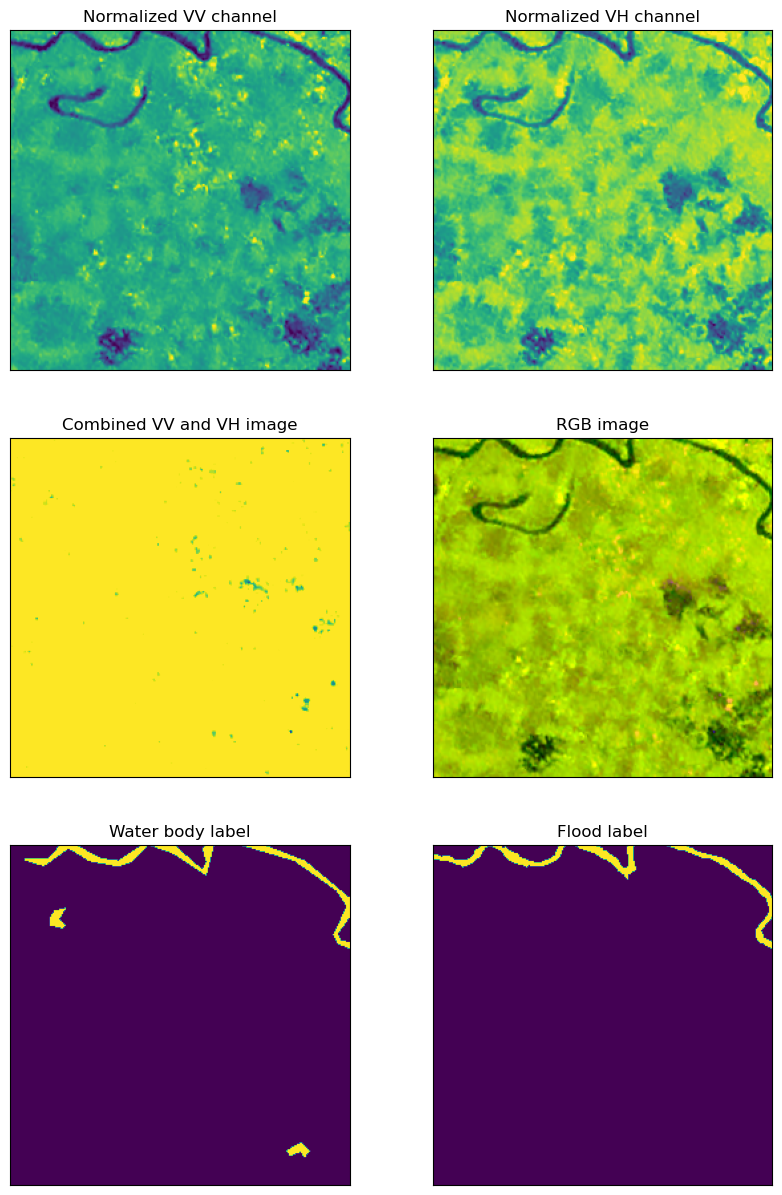

In [8]:
plot_maps(df_train_paths.loc[3000, :])

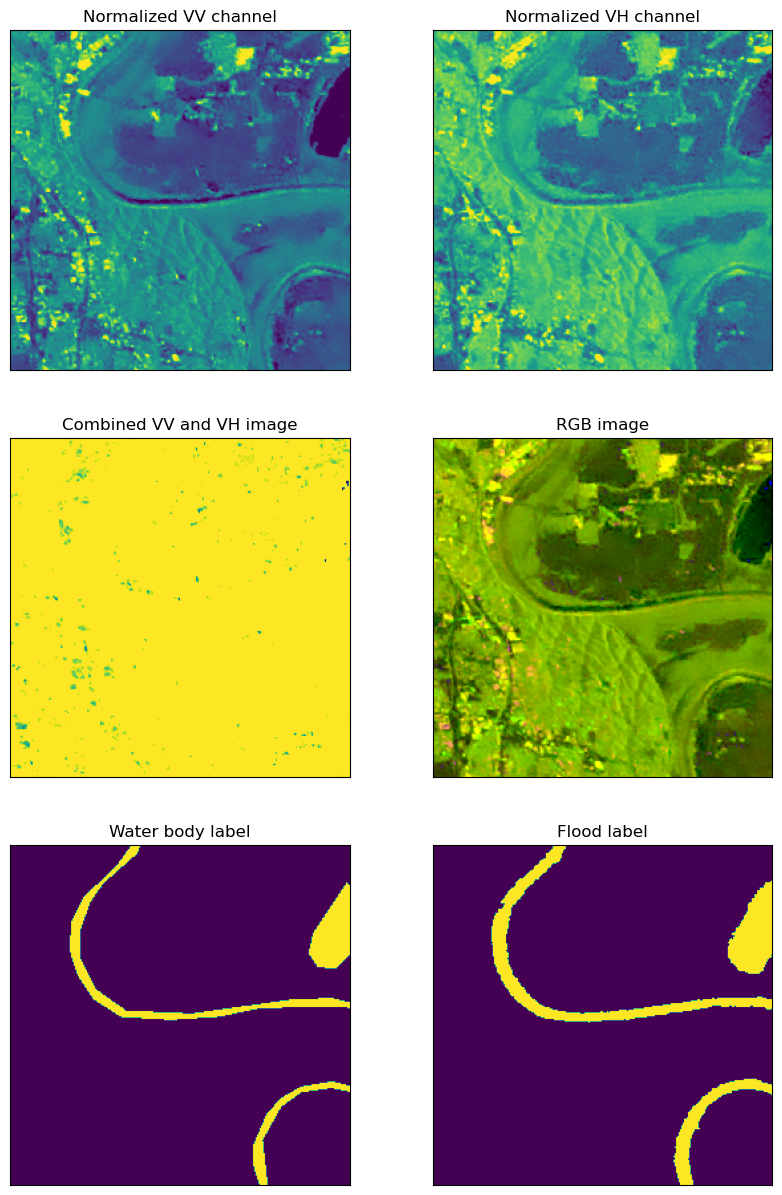

In [9]:
plot_maps(df_train_paths.loc[7000, :])

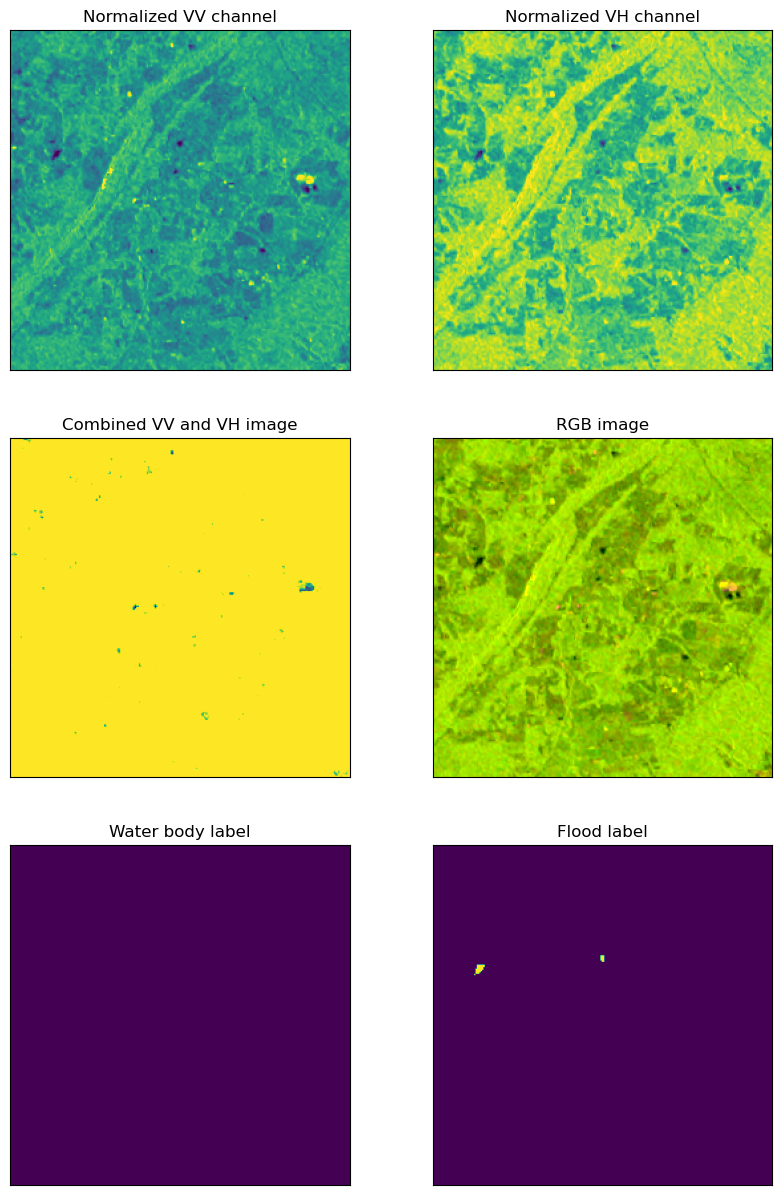

In [10]:
plot_maps(df_train_paths.loc[19700, :])

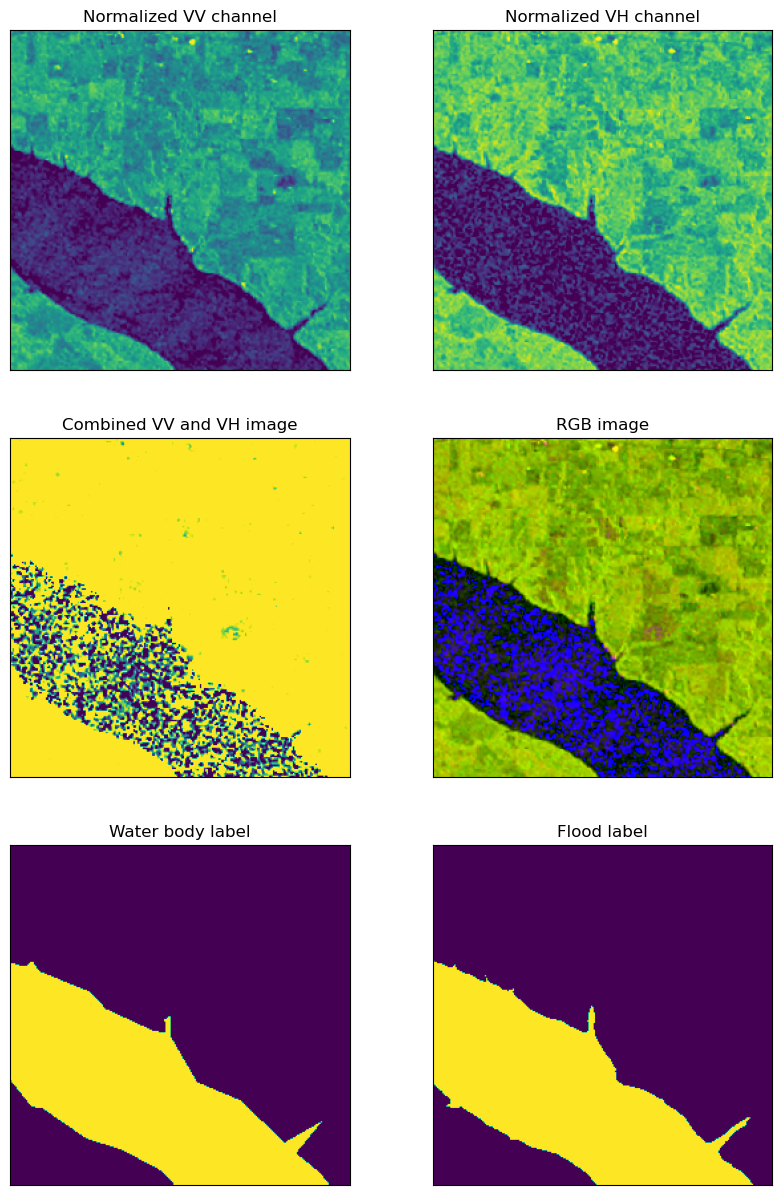

In [11]:
plot_maps(df_train_paths.loc[26000, :])

---

# Split data into training and validation dataset

**Important note:** 

The dataset located in the data/val path is labeled as test data in this project, and the validation data will now be separated from the train set.

In [12]:
np.random.seed(0)

In [13]:
region_choice = np.random.choice(df_train_paths["region_name"].unique(), 1)[0]
region_choice

'bangladesh'

- training data

In [14]:
df_train_paths_new = df_train_paths[df_train_paths["region_name"] != region_choice]
df_train_paths_new

,region_name,vv_channel,vh_channel,flood_label,water_body_label
6204,nebraska,data/train/nebraska_20170108t002112/tiles/vv/n...,data/train/nebraska_20170108t002112/tiles/vh/n...,data/train/nebraska_20170108t002112/tiles/floo...,data/train/nebraska_20170108t002112/tiles/wate...
6205,nebraska,data/train/nebraska_20170108t002112/tiles/vv/n...,data/train/nebraska_20170108t002112/tiles/vh/n...,data/train/nebraska_20170108t002112/tiles/floo...,data/train/nebraska_20170108t002112/tiles/wate...
6206,nebraska,data/train/nebraska_20170108t002112/tiles/vv/n...,data/train/nebraska_20170108t002112/tiles/vh/n...,data/train/nebraska_20170108t002112/tiles/floo...,data/train/nebraska_20170108t002112/tiles/wate...
6207,nebraska,data/train/nebraska_20170108t002112/tiles/vv/n...,data/train/nebraska_20170108t002112/tiles/vh/n...,data/train/nebraska_20170108t002112/tiles/floo...,data/train/nebraska_20170108t002112/tiles/wate...
6208,nebraska,data/train/nebraska_20170108t002112/tiles/vv/n...,data/train/nebraska_20170108t002112/tiles/vh/n...,data/train/nebraska_20170108t002112/tiles/floo...,data/train/nebraska_20170108t002112/tiles/wate...
...,...,...,...,...,...
33400,northal,data/train/northal_20191227t234659/tiles/vv/no...,data/train/northal_20191227t234659/tiles/vh/no...,data/train/northal_20191227t234659/tiles/flood...,data/train/northal_20191227t234659/tiles/water...
33401,northal,data/train/northal_20191227t234659/tiles/vv/no...,data/train/northal_20191227t234659/tiles/vh/no...,data/train/northal_20191227t234659/tiles/flood...,data/train/northal_20191227t234659/tiles/water...
33402,northal,data/train/northal_20191227t234659/tiles/vv/no...,data/train/northal_20191227t234659/tiles/vh/no...,data/train/northal_20191227t234659/tiles/flood...,data/train/northal_20191227t234659/tiles/water...
33403,northal,data/train/northal_20191227t234659/tiles/vv/no...,data/train/northal_20191227t234659/tiles/vh/no...,data/train/northal_20191227t234659/tiles/flood...,data/train/northal_20191227t234659/tiles/water...


- validation data

In [15]:
df_valid_paths = df_train_paths[df_train_paths["region_name"] == region_choice]
df_valid_paths

,region_name,vv_channel,vh_channel,flood_label,water_body_label
0,bangladesh,data/train/bangladesh_20170314t115609/tiles/vv...,data/train/bangladesh_20170314t115609/tiles/vh...,data/train/bangladesh_20170314t115609/tiles/fl...,data/train/bangladesh_20170314t115609/tiles/wa...
1,bangladesh,data/train/bangladesh_20170314t115609/tiles/vv...,data/train/bangladesh_20170314t115609/tiles/vh...,data/train/bangladesh_20170314t115609/tiles/fl...,data/train/bangladesh_20170314t115609/tiles/wa...
2,bangladesh,data/train/bangladesh_20170314t115609/tiles/vv...,data/train/bangladesh_20170314t115609/tiles/vh...,data/train/bangladesh_20170314t115609/tiles/fl...,data/train/bangladesh_20170314t115609/tiles/wa...
3,bangladesh,data/train/bangladesh_20170314t115609/tiles/vv...,data/train/bangladesh_20170314t115609/tiles/vh...,data/train/bangladesh_20170314t115609/tiles/fl...,data/train/bangladesh_20170314t115609/tiles/wa...
4,bangladesh,data/train/bangladesh_20170314t115609/tiles/vv...,data/train/bangladesh_20170314t115609/tiles/vh...,data/train/bangladesh_20170314t115609/tiles/fl...,data/train/bangladesh_20170314t115609/tiles/wa...
...,...,...,...,...,...
6199,bangladesh,data/train/bangladesh_20170712t115615/tiles/vv...,data/train/bangladesh_20170712t115615/tiles/vh...,data/train/bangladesh_20170712t115615/tiles/fl...,data/train/bangladesh_20170712t115615/tiles/wa...
6200,bangladesh,data/train/bangladesh_20170712t115615/tiles/vv...,data/train/bangladesh_20170712t115615/tiles/vh...,data/train/bangladesh_20170712t115615/tiles/fl...,data/train/bangladesh_20170712t115615/tiles/wa...
6201,bangladesh,data/train/bangladesh_20170712t115615/tiles/vv...,data/train/bangladesh_20170712t115615/tiles/vh...,data/train/bangladesh_20170712t115615/tiles/fl...,data/train/bangladesh_20170712t115615/tiles/wa...
6202,bangladesh,data/train/bangladesh_20170712t115615/tiles/vv...,data/train/bangladesh_20170712t115615/tiles/vh...,data/train/bangladesh_20170712t115615/tiles/fl...,data/train/bangladesh_20170712t115615/tiles/wa...


## Save datasets with paths to .csv

In [16]:
df_train_paths.to_csv("data/df_train_paths.csv", index=False)
df_train_paths_new.to_csv("data/df_train_paths_new.csv", index=False)
df_valid_paths.to_csv("data/df_valid_paths.csv", index=False)
df_test_paths.to_csv("data/df_test_paths.csv", index=False)